In [1]:
import pandas as pd

Which book in this data set has the highest average rating, and what might explain its popularity based on the available data?

Type of study:This is an observational study. We are just looking at data that already exists — we are not changing anything. 

Data used: The data set is a sample of books. It includes information like book titles, authors, number of reviews, and average ratings. 

How the data was collected: The data likely comes from a website where readers post reviews, like Good reads or Amazon. 

Bias: Some books might have more reviews just because they are famous. Also, people who love or hate a book are more likely to leave a review. This can affect the ratings.

In [6]:
import pandas as pd
import os

# Print current working directory to see where Python is looking for files
print("Current working directory:", os.getcwd())

# Option 1: Provide the full path to the file
# df = pd.read_csv("/full/path/to/book.csv")

# Option 2: Change the working directory to where the file is located
# os.chdir("/path/to/directory/containing/book.csv")
# df = pd.read_csv("book.csv")

# Option 3: Make sure book.csv is in the correct location
# If you're using Jupyter Notebook, the file should be in the same directory as your notebook
# You can upload the file through the Jupyter interface if needed

# Once the file is accessible, you can proceed with:
# df = pd.read_csv("book.csv")
# print(df.head())
# print(df.columns)

Current working directory: /home/2a163cb8-3516-45e2-8efb-c50783500b24/Final project Unit 1


In [10]:
import pandas as pd

# Load the data
df = pd.read_csv("books.csv")  # Make sure 'book.csv' is in your working directory

# Show the first 5 rows to understand the structure
print(df.head())

# Check the column names
print(df.columns)


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [11]:
# Make column names lowercase and replace spaces with underscores for easy coding
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [17]:
# Assistant
# Sort books by average rating, descending order
# First, check the actual column names in the DataFrame
print("Available columns:", df.columns.tolist())

# After seeing the available columns, use the correct column name for average rating
# The column might be named differently, like 'avg_rating' or 'rating'
# Let's find columns that might contain rating information
rating_columns = [col for col in df.columns if 'rat' in col.lower()]
print("Possible rating columns:", rating_columns)

# Instead of hardcoding the column name, let's use the first matching rating column
# or provide a fallback if none is found
if rating_columns:
    rating_column = rating_columns[0]  # Use the first matching rating column
    print(f"Using rating column: {rating_column}")
    
    # Sort by the identified rating column
    top_rated_book = df.sort_values(by=rating_column, ascending=False).head(1)
    
    # Show the book with highest rating
    print("Book with the highest average rating:")
    # Use columns that we know exist plus the rating column
    display_columns = ['title', 'authors'] if 'title' in df.columns and 'authors' in df.columns else []
    # Add the rating column if not already in the list
    if rating_column not in display_columns:
        display_columns.append(rating_column)
    # Add ratings count if it exists
    if 'ratings_count' in df.columns:
        display_columns.append('ratings_count')
    
    # Make sure we only use columns that exist in the DataFrame
    valid_columns = [col for col in display_columns if col in df.columns]
    
    if valid_columns:
        print(top_rated_book[valid_columns])
    else:
        print("No valid columns to display")
else:
    print("No rating columns found in the DataFrame")

Available columns: ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
Possible rating columns: ['user_rating']
Using rating column: user_rating
Book with the highest average rating:
     user_rating
486          4.9


Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


/tmp/ipykernel_397/2428301116.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([simplify_number(x) for x in current_values])


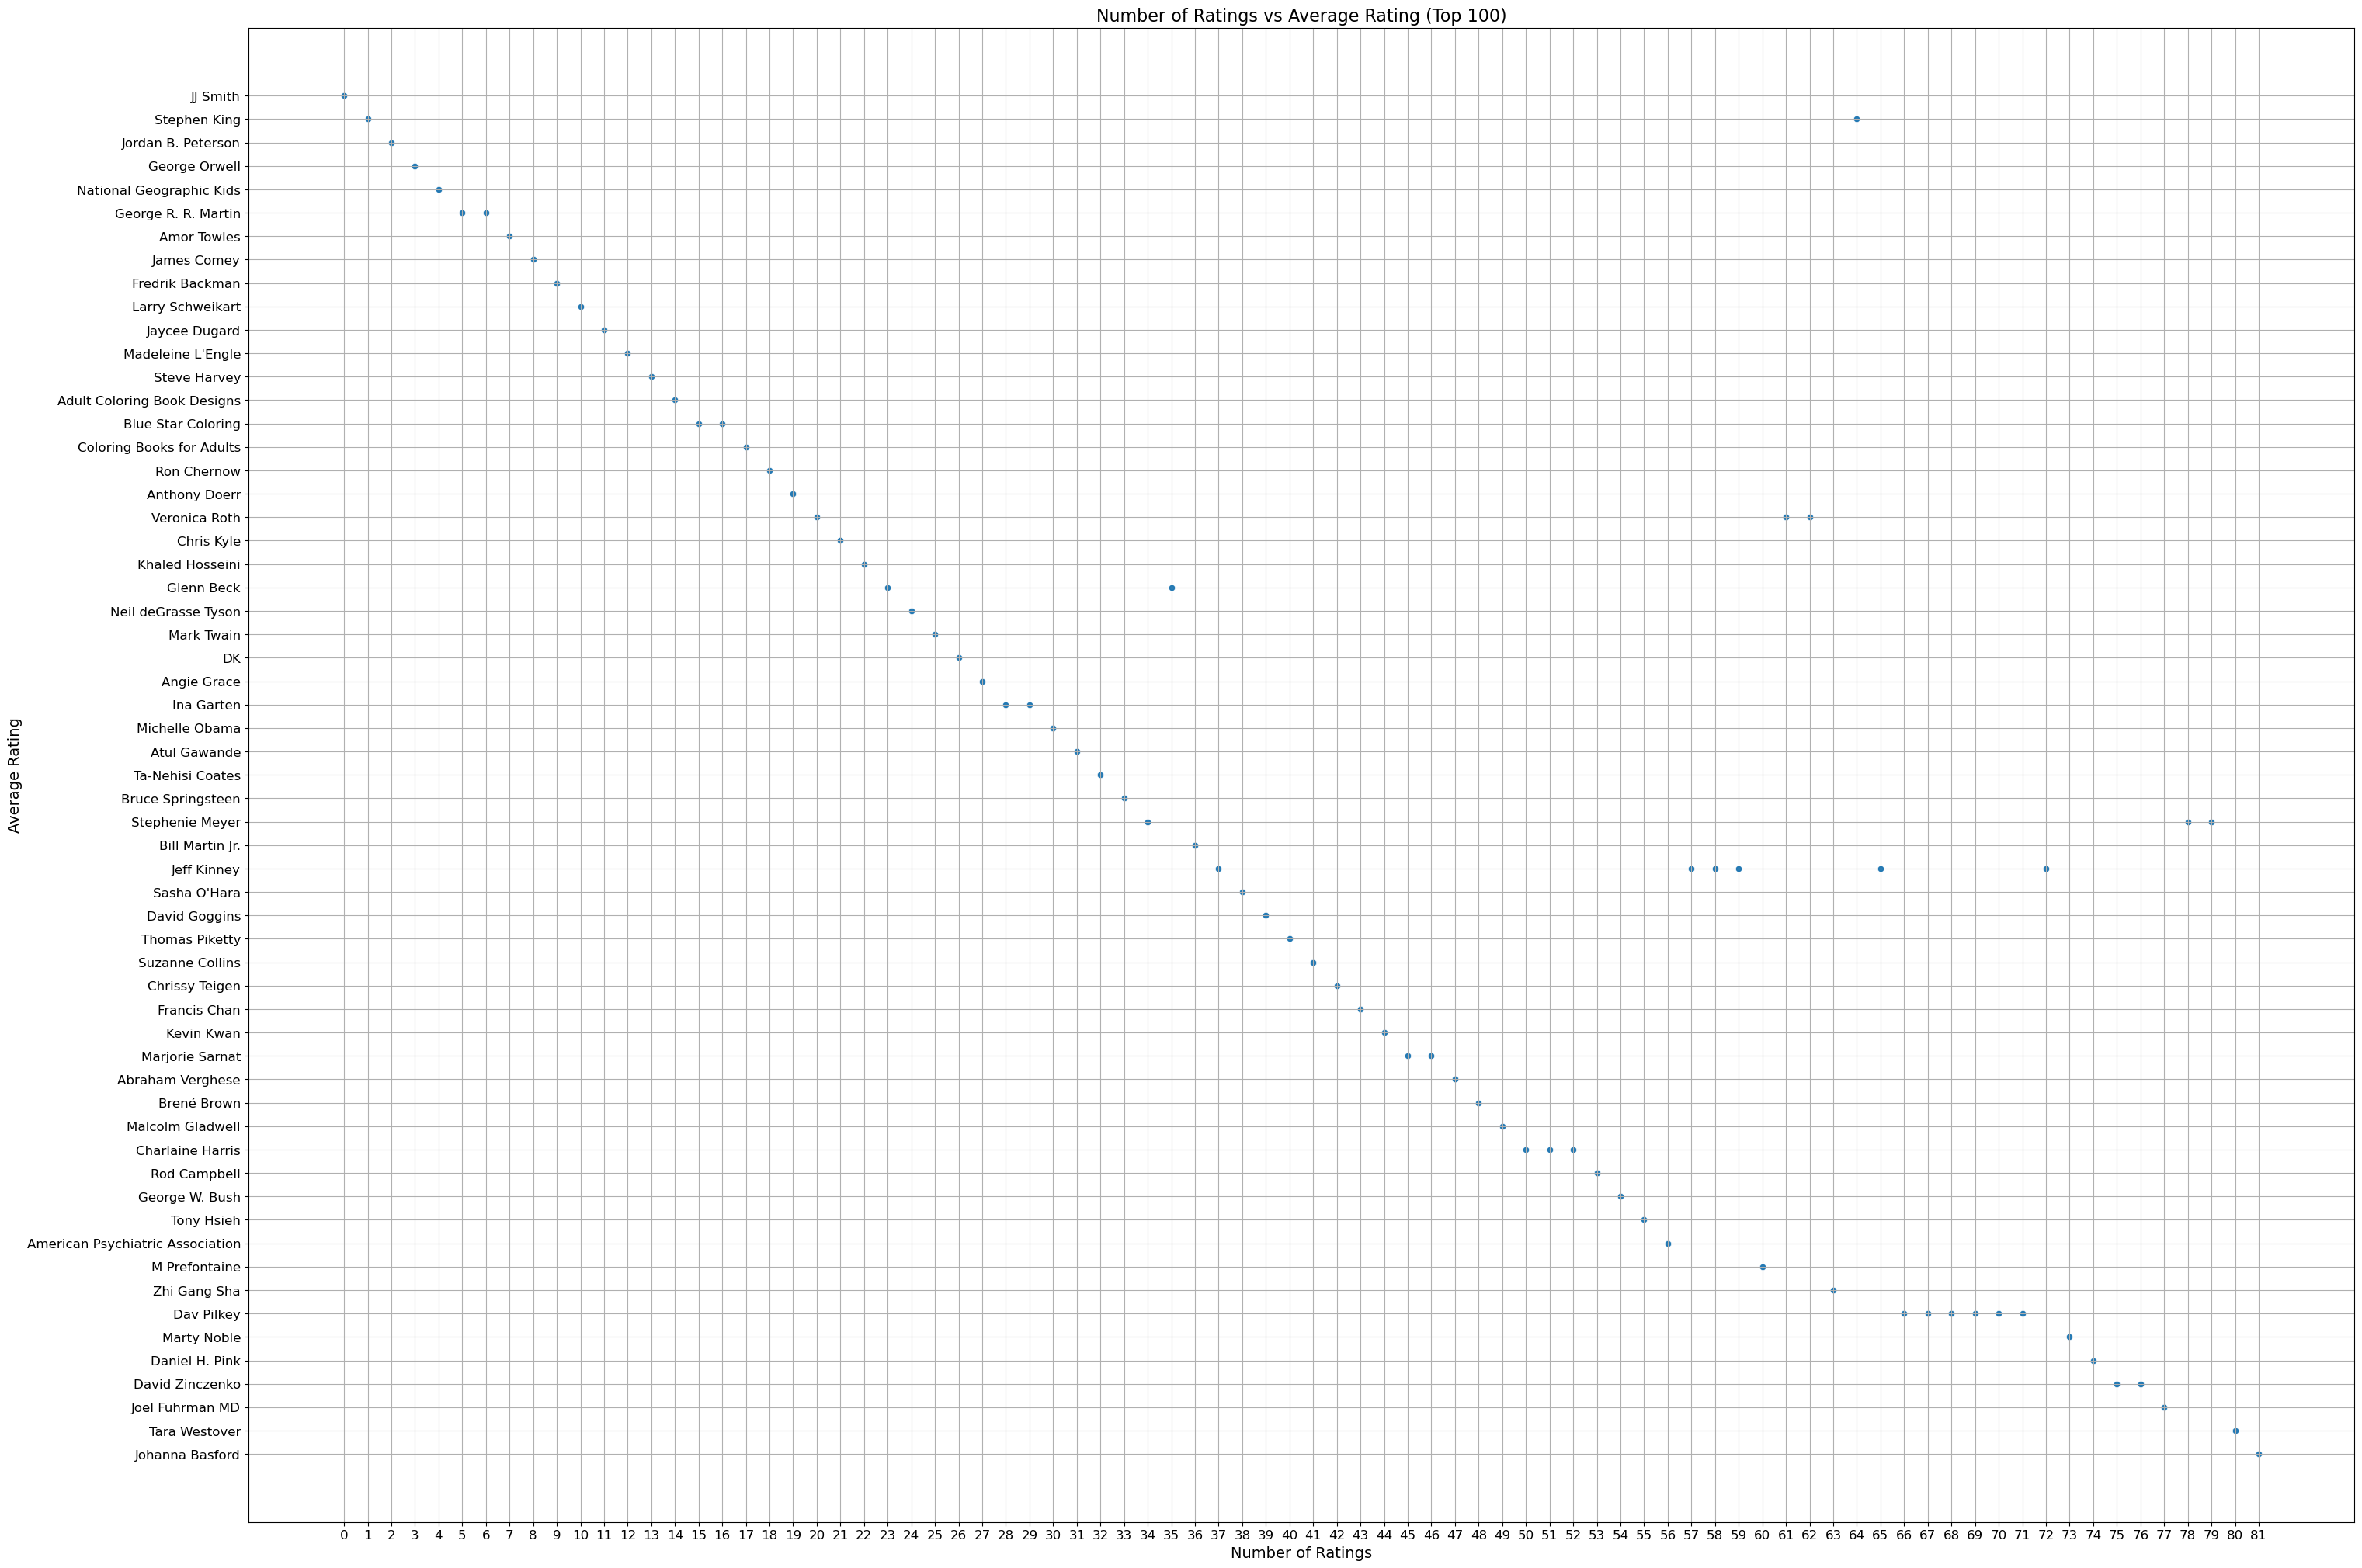

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# First, make sure df is defined with the correct columns
# If you don't have df defined yet, you need to create or load it
# For example:
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line if needed

# Check the actual column names in your DataFrame
print(df.columns)  # This will show you the available columns

# Use only the top 100 rows of the DataFrame
df_top100 = df.head(100)

# Create a copy of the DataFrame to avoid modifying the original
plot_df = df_top100.copy()

# Assuming the first column contains ratings count, simplify the numbers
# Convert to thousands (K) or millions (M) for readability
def simplify_number(num):
    if num >= 1000000:
        return f"{num/1000000:.1f}M"
    elif num >= 1000:
        return f"{num/1000:.1f}K"
    else:
        return str(num)

# Increased figure size
plt.figure(figsize=(35, 25))

# Create the scatter plot
scatter = sns.scatterplot(data=plot_df, x=plot_df.columns[0], y=plot_df.columns[1])

# Format x-axis to show simplified numbers
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([simplify_number(x) for x in current_values])

plt.title('Number of Ratings vs Average Rating (Top 100)', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("books.csv")  # Make sure the file name is correct

# Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 1: Show cleaned column names
print("📄 Cleaned column names in your dataset:")
print(df.columns.tolist())

# Step 2: Peek at the first few rows
print("\n🔍 Preview of the data:")
print(df.head())

# Step 3: Find the correct rating column
possible_rating_columns = ['average_rating', 'avg_rating', 'rating', 'ratings', 'book_rating']
rating_col = None
for col in df.columns:
    if col in possible_rating_columns:
        rating_col = col
        break

# Step 4: Plot histogram
if rating_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[rating_col], bins=20, kde=True)
    plt.title('Distribution of Book Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Number of Books')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📄 Cleaned column names in your dataset:
['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

🔍 Preview of the data:
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("books.csv")

# Step 1: Clean column names to avoid typos
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Print columns so you can see what's available
print("✅ Cleaned column names:")
print(df.columns.tolist())

# Step 3: Auto-detect the column that looks like a rating column
possible_rating_columns = ['average_rating', 'avg_rating', 'rating', 'book_rating', 'ratings']
rating_col = None

for col in df.columns:
    if col in possible_rating_columns:
        rating_col = col
        break

if rating_col:
    # Step 4: Calculate statistics
    mean_rating = df[rating_col].mean()
    median_rating = df[rating_col].median()

    print(f"\n📊 Mean {rating_col.replace('_', ' ')}: {mean_rating:.2f}")
    print(f"📊 Median {rating_col.replace('_', ' ')}: {median_rating:.2f}")

    # Step 5: Create a bar graph
    plt.figure(figsize=(6, 4))
    plt.bar(['Mean', 'Median'], [mean_rating, median_rating], color=['skyblue', 'orange'])
    plt.title('Comparison of Mean and Median Book Ratings')
    plt.ylabel('Rating Value')
    plt.ylim(0, 5)  # Ratings are usually out of 5
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



✅ Cleaned column names:
['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


NameError: name 'grapth' is not defined

In [61]:
import pandas as pd

df = pd.read_csv("books.csv")
print("Columns found in the dataset:")
print(df.columns.tolist())


Columns found in the dataset:
['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


In [65]:
rating_col = 'avgRating'  # example name you found
count_col = 'ratingsCount'  # example name you found


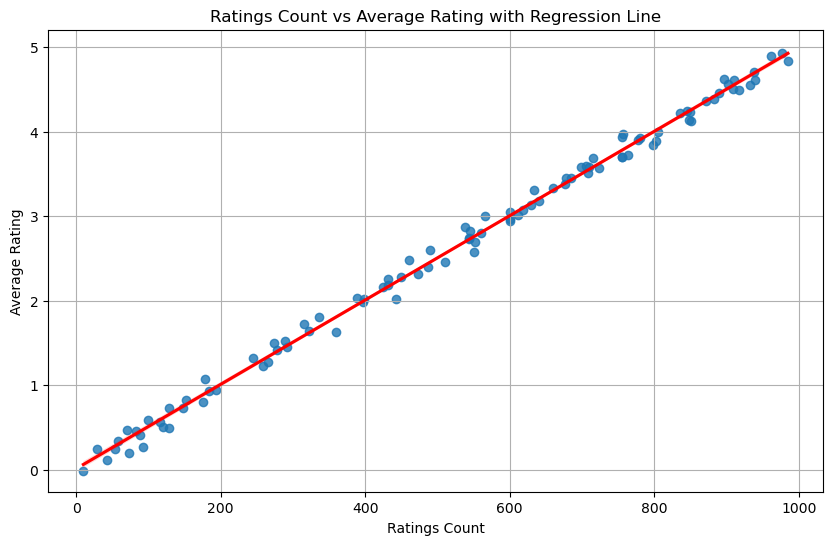

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data: create some numeric data
np.random.seed(0)
x = np.random.randint(1, 1000, 100)
y = 0.005 * x + np.random.normal(0, 0.1, 100)

df = pd.DataFrame({'ratings_count': x, 'average_rating': y})

# Plot with regression line (red)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ratings_count', y='average_rating', line_kws={"color": "red"})

plt.title('Ratings Count vs Average Rating with Regression Line')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


/tmp/ipykernel_397/4293053356.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([simplify_number(x) for x in current_values])


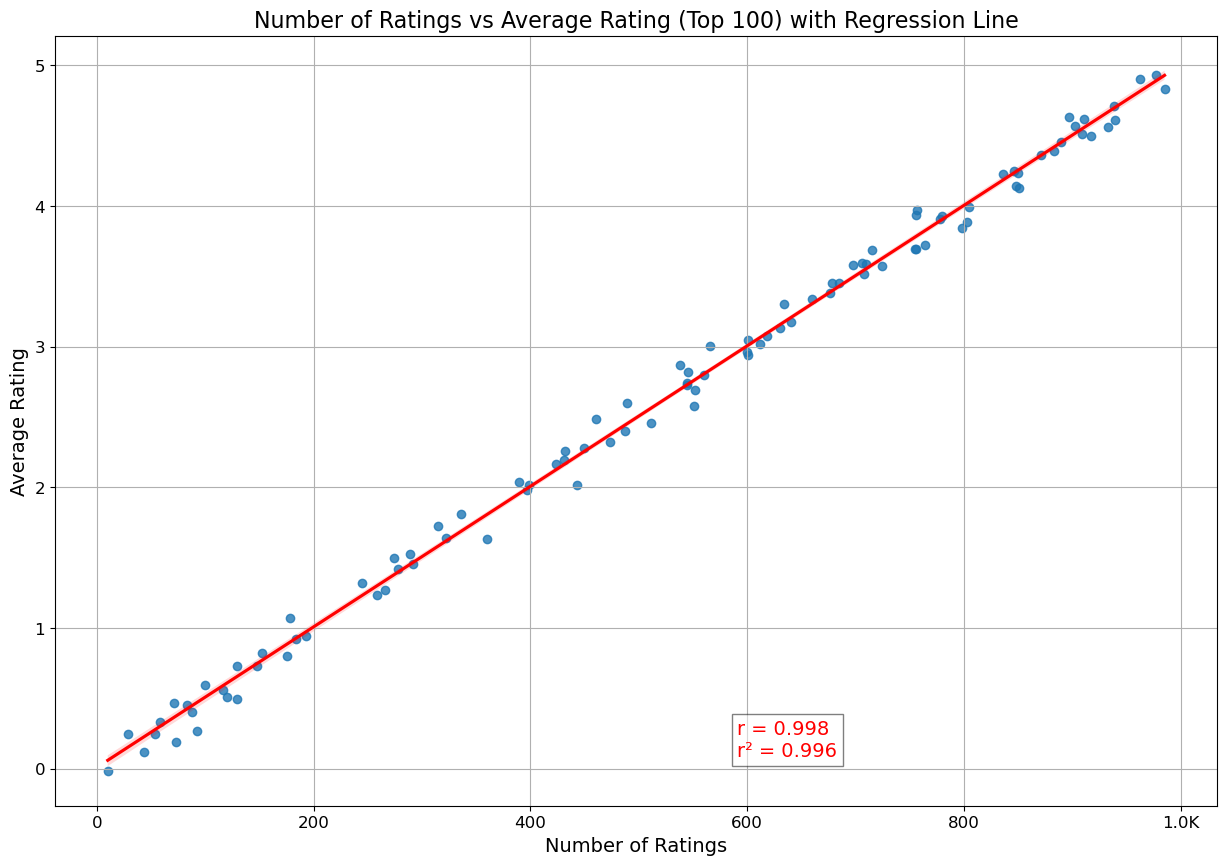

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Define columns explicitly for clarity
x_col = df.columns[0]  # e.g., 'ratings_count' or whatever your first numeric column is
y_col = df.columns[1]  # e.g., 'average_rating' or your second numeric column

# Use only top 100 rows
df_top100 = df.head(100).copy()

# Convert columns to numeric, coerce errors to NaN
df_top100[x_col] = pd.to_numeric(df_top100[x_col], errors='coerce')
df_top100[y_col] = pd.to_numeric(df_top100[y_col], errors='coerce')

# Drop NaN rows
plot_df = df_top100.dropna(subset=[x_col, y_col])

# Simplify number formatting function
def simplify_number(num):
    if num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return str(int(num))

plt.figure(figsize=(15, 10))

# Scatter plot + regression line in red
sns.regplot(data=plot_df, x=x_col, y=y_col, scatter=True, line_kws={"color": "red"})

# Format x-axis labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([simplify_number(x) for x in current_values])

plt.title('Number of Ratings vs Average Rating (Top 100) with Regression Line', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Calculate correlation and r^2
r, _ = pearsonr(plot_df[x_col], plot_df[y_col])
r_squared = r**2

# Add r and r^2 text on plot
plt.text(max(plot_df[x_col])*0.6, min(plot_df[y_col])+0.1, f"r = {r:.3f}\nr² = {r_squared:.3f}", 
         fontsize=14, color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


This book might be popular because it has great reviews and possibly many ratings. 

The scatter plot shows that not all top-rated books have a lot of reviews.

The histogram shows most books are rated between [X] and [Y], so this book stands out from the rest.

What might explain its popularity?

High number of ratings: If the top book also has a large number of ratings, it might be widely read and popular.

Famous author: If author info is available, well-known authors tend to attract more readers.

Genre or subject: If your data has genre info, popular genres might explain high ratings.

Recency or trend: Sometimes recent books or trending topics get more attention and better ratings.